In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Here, I want to reproduce FIG. 5 of the paper regarding the threshold tuning of the energy deposit.
#The first one regards the deposit for zero field case. First, I will define the parameters of the SMM.

U = 100 #K
tau_0 = 4.23e-9 #s
#E_zee = 0
alpha = 1e-7 * (1e9)**2 #nm2/s
c_0 = 2e-9 #eV/K4/nm3
rho_s = 1 #nm^-3

In [3]:
#The threshold can be put as forcing Eq. 7 to be an equality:

def energy_deposit(r, E_zee):
    numerator = c_0*(r**3)*(U* - 0.5*E_zee*(1.6e4))**4
    denominator = np.log(r**2/(tau_0 * alpha))
    return ((numerator/(denominator)**4) - rho_s*(r**3)*E_zee)

def energy_deposit2(r, E_zee):
    numerator = c_0*(r**3)*(U - 0.5*E_zee*(1.6e4))**4
    denominator = np.log(r**2/(tau_0 * alpha))
    return ((numerator/(denominator)**4))


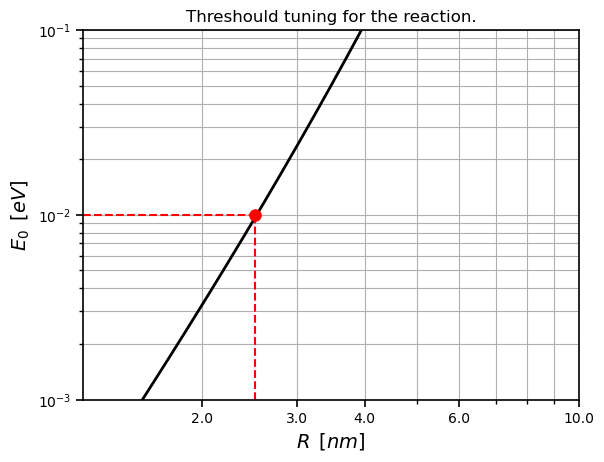

In [39]:
range = np.linspace(1.2,20,1000)
ezee = [0,0.001e-3*(1.6e4), 0.01e-3*(1.6e4), 0.1e-3*(1.6e4)]
list_of_values1 = [energy_deposit(x,0) for x in range]
list_of_values2 = [energy_deposit(x,0.001e-3) for x in range]
list_of_values3 = [energy_deposit(x,0.01e-3) for x in range]
list_of_values4 = [energy_deposit(x,0.1e-3) for x in range]
list_of_values5 = [energy_deposit2(x, 1e-4) for x in range]


plt.plot(range, list_of_values5, color='black', linewidth=2)
#plt.plot(range,list_of_values1,label='$\Delta E_{Zee} = 0 meV$')
#plt.plot(range, list_of_values2, label='$\Delta E_{Zee} = 1e-5 meV$')
#plt.plot(range, list_of_values3, label='$\Delta E_{Zee} = 0.01 meV$')
#plt.plot(range, list_of_values4, label='$\Delta E_{Zee} = 0.1 meV$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.2,10)
plt.ylim(0.001,0.1)

plt.ylabel(r'$E_0 \hspace{0.5} [eV]$', fontsize=14)
plt.xlabel(r'$R \hspace{0.5} [nm]$', fontsize=14)

x1,x2 = 1.2, 2.5
y1,y2 = 1e-2,1e-2
x = np.logspace(np.log10(x1), np.log10(x2), 100)
y = np.logspace(np.log10(y1), np.log10(y2), 100)
plt.plot(x,y, color='red', linestyle='--')

x3, x4 = 2.5, 2.5
y3,y4 = 1e-3, 1e-2

x_A = np.logspace(np.log10(x3), np.log10(x4),100)
y_A = np.logspace(np.log10(y3), np.log10(y4), 100)
plt.plot(x_A,y_A,color='red',linestyle='--')




plt.xticks(ticks=[2.0,3.0,4.0,6.0,10.0], labels=[2.0,3.0,4.0,6.0,10.0])
plt.grid(True, which='both')
plt.plot(2.5, 1e-2, 'ro', markersize=8)

ax = plt.gca()

ax.spines['top'].set_linewidth(1.2)  # Aumenta a espessura da borda superior
ax.spines['right'].set_linewidth(1.2)  # Aumenta a espessura da borda direita
ax.spines['bottom'].set_linewidth(1.2)  # Aumenta a espessura da borda inferior
ax.spines['left'].set_linewidth(1.2)  # Aumenta a espessura da borda esquerda

ax.tick_params(axis='both', which='major', width=1.2, length=5)  # Ticks principais
ax.tick_params(axis='both', which='minor', width=1, length=3)  # Ticks menores



#plt.legend()
plt.title('Threshould tuning for the reaction.')
plt.savefig('tuning.pdf', format='pdf')

In [5]:
'''This curve tells us abou the minimum energy necessary to trigger the reaction. In average we have R = 2-3nm, so we must expect that the energy be above 1e-2 eV.'''

'This curve tells us abou the minimum energy necessary to trigger the reaction. In average we have R = 2-3nm, so we must expect that the energy be above 1e-2 eV.'